# Assignment 2: Who Survived the Titanic?
For this assignment, we will analyze the open dataset with real data on the passengers aboard the Titanic.

In [1]:
%matplotlib inline
%precision 3

from numpy.random import randn
import numpy as np
import pandas as pd
np.random.seed(123)
import os
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)
pd.options.display.max_rows = 10

from numpy import nan as NA 

### Download the data from Kaggle website:
https://www.kaggle.com/c/titanic/data, file
“train.csv”

In [2]:
!powershell -command "& {gc train.csv -head 5}"

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


### The definition of all variables can be found on the same page, in the Data Dictionary section

In [3]:
!type "data dict.txt"

Data Dictionary
---------------
Variable	Definition		Key
survival	Survival		0 = No, 1 = Yes
pclass		Ticket class		1 = 1st, 2 = 2nd, 3 = 3rd
sex		Sex
Age		Age in years
sibsp		# of siblings / spouses aboard the Titanic
parch		# of parents / children aboard the Titanic
ticket		Ticket number
fare		Passenger fare
cabin		Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes
--------------
[pclass]: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

[age]: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

[sibsp]: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

[parch]: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


### Read the data from the file into pandas dataframe

In [4]:
survi = pd.read_csv('train.csv', index_col='PassengerId')
survi

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
# transform headers into lowercase

survi.index.name = survi.index.name.lower()
survi.columns = survi.columns.map(lambda x: x[:].lower())

In [6]:
# added a column to count the onboard passenger.

survi['record']=1
survi

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,record
passengerid,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1


In [7]:
# check missing value distribution in dateset.
survi.isnull().sum().sort_values()

survived      0
pclass        0
name          0
sex           0
sibsp         0
           ... 
fare          0
record        0
embarked      2
age         177
cabin       687
Length: 12, dtype: int64

In [8]:
# check the age distribution
ages = survi['age'].unique()
ages.sort()
ages

array([  0.42,   0.67,   0.75,   0.83,   0.92,   1.  ,   2.  ,   3.  ,
         4.  ,   5.  ,   6.  ,   7.  ,   8.  ,   9.  ,  10.  ,  11.  ,
        12.  ,  13.  ,  14.  ,  14.5 ,  15.  ,  16.  ,  17.  ,  18.  ,
        19.  ,  20.  ,  20.5 ,  21.  ,  22.  ,  23.  ,  23.5 ,  24.  ,
        24.5 ,  25.  ,  26.  ,  27.  ,  28.  ,  28.5 ,  29.  ,  30.  ,
        30.5 ,  31.  ,  32.  ,  32.5 ,  33.  ,  34.  ,  34.5 ,  35.  ,
        36.  ,  36.5 ,  37.  ,  38.  ,  39.  ,  40.  ,  40.5 ,  41.  ,
        42.  ,  43.  ,  44.  ,  45.  ,  45.5 ,  46.  ,  47.  ,  48.  ,
        49.  ,  50.  ,  51.  ,  52.  ,  53.  ,  54.  ,  55.  ,  55.5 ,
        56.  ,  57.  ,  58.  ,  59.  ,  60.  ,  61.  ,  62.  ,  63.  ,
        64.  ,  65.  ,  66.  ,  70.  ,  70.5 ,  71.  ,  74.  ,  80.  ,
          nan])

In [9]:
# check the pupolation of survivor and victom, get and idea of the data.
survi.groupby('survived').size()

survived
0    549
1    342
dtype: int64

In [10]:
# and how many samples' age have a missing value.
survi[survi['age'].isnull()].groupby('survived').size()

survived
0    125
1     52
dtype: int64

In [11]:
# fill the None value in Age with '-1', for easier manipulation, especially for indexing.
survi=survi.fillna({'age':-1})
survi

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,record
passengerid,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-1.0,1,2,W./C. 6607,23.4500,NaN,S,1


### Analyze, clean and transform the data to answer the following question:
- What categories of passengers were most likely to survive the Titanic disaster?

In [12]:
# see bottom of this notebook.  Answered below the plot.

### You might include the following attributes in your analysis:
- Passenger age
- Passenger gender
- Cabin class the passenger travelled in (variable ‘ticket class’)

In [13]:
# create another dataframe 'concern' to concentrate on concerned parameters.

concern = survi.loc[:,['sex','age','pclass','record','survived']]
concern

,sex,age,pclass,record,survived
passengerid,,,,,
1,male,22.0,3,1,0
2,female,38.0,1,1,1
3,female,26.0,3,1,1
4,female,35.0,1,1,1
5,male,35.0,3,1,0
...,...,...,...,...,...
887,male,27.0,2,1,0
888,female,19.0,1,1,1
889,female,-1.0,3,1,0


In [14]:
# verify if any other missing value in the dataset.
concern.isnull().sum()

sex         0
age         0
pclass      0
record      0
survived    0
dtype: int64

In [15]:
# use pandas cut method to bin the population into several age groups.  Number of people in each group are similar.
# The first group (-2,0] indicate the unknow age group, which has most people.
# Then add this group information into another engineered column 'cats', meaning category.

bins = [-2,0,15,22,33,45,85]
concern['cats'] = pd.cut(concern['age'],bins)
concern

,sex,age,pclass,record,survived,cats
passengerid,,,,,,
1,male,22.0,3,1,0,"(15, 22]"
2,female,38.0,1,1,1,"(33, 45]"
3,female,26.0,3,1,1,"(22, 33]"
4,female,35.0,1,1,1,"(33, 45]"
5,male,35.0,3,1,0,"(33, 45]"
...,...,...,...,...,...,...
887,male,27.0,2,1,0,"(22, 33]"
888,female,19.0,1,1,1,"(15, 22]"
889,female,-1.0,3,1,0,"(-2, 0]"


In [16]:
# verify the group information are expected.
concern['cats'].unique().sort_values()

[(-2, 0], (0, 15], (15, 22], (22, 33], (33, 45], (45, 85]]
Categories (6, interval[int64]): [(-2, 0] < (0, 15] < (15, 22] < (22, 33] < (33, 45] < (45, 85]]

In [17]:
# Since column 'cats' are interval, which cannot be used in scatter plot, create this dictionary 
# for adding an alternate numeric column. See below.

mapping=dict(list(zip(concern['cats'].unique(),range(6))))

In [18]:
# Because demonstrate the survivor distribution in sex, age and class could be complicated, plan to separate the sex
# into two different plot, then compare the age and class.

# filter male first, and grouped by two columns: age group and ticket class.
male = concern[concern['sex']=='male'].groupby(['cats','pclass'])

# calculate sum on the group, which indicate the onboard population for each age/class group.
# using the dictionary above, add another column as the x-axis for scatter plot, which is aging group.
onboard_male = male.record.sum().reset_index()
onboard_male['x_id']=onboard_male['cats'].replace(mapping)

# use similar logic to calculate survivors for each age/class group.
surviv_male = male.survived.sum().reset_index()
surviv_male['x_id']=surviv_male['cats'].replace(mapping)

# and caculate female the same way.
female = concern[concern['sex']=='female'].groupby(['cats','pclass'])

onboard_female = female.record.sum().reset_index()
onboard_female['x_id']=onboard_male['cats'].replace(mapping)

surviv_female = female.survived.sum().reset_index()
surviv_female['x_id']=surviv_female['cats'].replace(mapping)

surviv_female

,cats,pclass,survived,x_id
0,"(-2, 0]",1,9,3
1,"(-2, 0]",2,2,3
2,"(-2, 0]",3,25,3
3,"(0, 15]",1,2,5
4,"(0, 15]",2,10,5
...,...,...,...,...
13,"(33, 45]",2,16,1
14,"(33, 45]",3,3,1
15,"(45, 85]",1,19,4
16,"(45, 85]",2,6,4


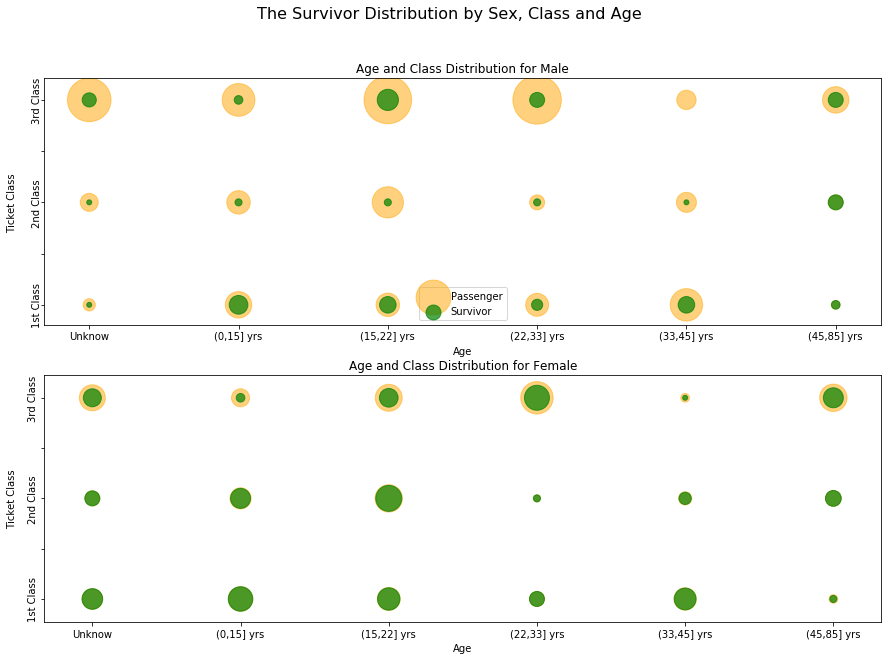

In [19]:
# prepare two scatter plot, add title.

fig = plt.figure(figsize=(15, 10))
fig.suptitle("The Survivor Distribution by Sex, Class and Age", fontsize = 16)

# ax1 is the first scatter, shows male surviving distribution.
ax1 = fig.add_subplot(2,1,1)
ax1.set_title("Age and Class Distribution for Male")
ax1.set_xlabel("Age")
ax1.set_ylabel("Ticket Class")

# Below code is to replace the x-axis label into understandable format.  Otherwise, the numbered groups appears.
# The class information also rewritten.
ax1.tick_params(labelcolor='w')
ax1.text(0,0.7,'Unknow',ha='center',va='center')
ax1.text(1,0.7,'(0,15] yrs',ha='center',va='center')
ax1.text(2,0.7,'(15,22] yrs',ha='center',va='center')
ax1.text(3,0.7,'(22,33] yrs',ha='center',va='center')
ax1.text(4,0.7,'(33,45] yrs',ha='center',va='center')
ax1.text(5,0.7,'(45,85] yrs',ha='center',va='center')
ax1.text(-0.35,1,'1st Class',ha='center',va='center',rotation='vertical')
ax1.text(-0.35,2,'2nd Class',ha='center',va='center',rotation='vertical')
ax1.text(-0.35,3,'3rd Class',ha='center',va='center',rotation='vertical')

# generate the scatter, using age group as the x virable, class information as y, and using the marker size 
# to demonstrate the population (bigger dot means more people in this group onboard the ship).
ax1.scatter(onboard_male['x_id'],onboard_male['pclass'],
            onboard_male['record']*25,
            label='Passenger',
            alpha=0.5,color='orange')

# sameway to draw the survivor populatin, bigger green dot means more people in this group survive.
ax1.scatter(surviv_male['x_id'],surviv_male['pclass'],
            surviv_male['survived']*25,
            label='Survivor',
            alpha=0.7,color='green')
ax1.legend()

# ax2 shows the female distribution.  Logic is the same.
ax2 = fig.add_subplot(2,1,2)
ax2.set_title("Age and Class Distribution for Female")
ax2.set_xlabel("Age")
ax2.set_ylabel("Ticket Class")

ax2.tick_params(labelcolor='w')
ax2.text(0,0.65,'Unknow',ha='center',va='center')
ax2.text(1,0.65,'(0,15] yrs',ha='center',va='center')
ax2.text(2,0.65,'(15,22] yrs',ha='center',va='center')
ax2.text(3,0.65,'(22,33] yrs',ha='center',va='center')
ax2.text(4,0.65,'(33,45] yrs',ha='center',va='center')
ax2.text(5,0.65,'(45,85] yrs',ha='center',va='center')
ax2.text(-0.4,1,'1st Class',ha='center',va='center',rotation='vertical')
ax2.text(-0.4,2,'2nd Class',ha='center',va='center',rotation='vertical')
ax2.text(-0.4,3,'3rd Class',ha='center',va='center',rotation='vertical')

ax2.scatter(onboard_female['x_id'],onboard_female['pclass'],
            onboard_female['record']*25,
            alpha=0.5,color='orange')
ax2.scatter(surviv_female['x_id'],surviv_female['pclass'],
            surviv_female['survived']*25,
            alpha=0.7,color='green')

plt.show()

In [20]:
# Above result shows female has much higher surviving rate.  And in either group, most of the kids survived.
# Look further, higher class (1st Class) have significantly higher surviving rate (green portion is occupying
# bigger space in orange) than lower class.

- What other attributes did you use for the analysis? Explain how you used them. Provide a complete list of all attributes used.

In [21]:
# following attributes are included, as they are relevant to considered situations: age, gender, class, and surviving.

# Variable    Definition
# -----------------------
# survival    Survival
# pclass      Ticket class
# sex         Sex
# Age         Age in years

# I cut age into 6 different buckets (including one for unknown ages); pclass is used with age to group records, and 
# further demonstrate the distribution of passenger and survivor.  Survival is used to calculate how many peoper in
# each goup and surviving, and compare to the onboard passenger to understand the surviving ration in each group.

# I didn't do further analysis because I believe this result could provide a pretty good understanding already.
# However, if more effort would contribute, I may look into sibling and parents data, as I believe the onboarding 
# relative would help improving the surviving chance.

- Did you engineer any attributes? If yes, explain the rationale and how the new attributes were used in the analysis?

In [22]:
# Yes, as commented above, the column 'record' is for calculate the onboarded passenger;
# the column 'cats' is to separate the age groups;
# column 'x_id' is a numberic alternative of 'cats' for using in plot.

- If you have excluded any attributes from the analysis, provide an explanation why you believe they can be excluded

In [23]:
# following attributes are excluded, as they are NOT relevant to considered situations: age, gender, class

# Variable   Definition
# -----------------------
# sibsp      # of siblings / spouses aboard the Titanic
# parch      # of parents / children aboard the Titanic
# ticket     Ticket number
# fare       Passenger fare
# cabin      Cabin number
# embarked   Port of Embarkation

# excpect sibsp and parch could be remotely relevant to the surviving chance, I cannot see obvious 
# relationship between other four attributes and the surviving rate.  E.g., ticket number is just 
# sequence, not means anything; same class ticket could have different fare value;
# and where the passenger get onboard also not relevant as it's not a factor to current situation.
# Regarding cabin number, if we can understand the cabin location, it could be useful as different
# position on the ship can significantly affect the chance of escape.

- How did you treat missing values? Provide a detailed explanation in the comments.

In [24]:
# as mentioned above, only missing values in the considered attributes are in 'age'.

# use fillna({'age':-1}) to change 'NaN' value into number, easier for use the 'age' as index/group,
# and not just drop them.

- Submit Jupyter Notebook with your solution via BlackBoard prior to the next class